<h3>
    T - Test   tell whether the diff between means of population and sample of a data is significant
    <h3>

In [1]:
age=[5,3,65,22,54,76,23,54,1,34,54,76,34,87,43,23,67,87,43,22,77,88,90]

In [2]:
len(age)

23

In [3]:
import numpy as np
mean_pop=np.mean(age)
print(mean_pop)

49.04347826086956


In [4]:
sam=10
age_sam=np.random.choice(age,sam)

In [5]:
len(age_sam)

10

In [6]:
age_sam

array([23,  5, 23,  3, 54, 23,  3, 22, 90,  5])

In [7]:
mean_sam=np.mean(age_sam)
print(mean_sam)

25.1


In [8]:
from scipy.stats import ttest_1samp

In [9]:
ttest,pvalue=ttest_1samp(age_sam,mean_pop)

In [10]:
print(ttest)

-2.743518754598676


In [11]:
print(pvalue)

0.022716410221089958


In [12]:
if pvalue<0.05:
    print('Null hypothesis is rejected')
else:
    print('Null hypothesis is accepted')

Null hypothesis is rejected


<h3> Two sample t-test: It is used to determine the statistical evidence between two independent groups by using their mean
    <h3>

In [13]:
a=[78,34,65,21,45,66,87,32,21,33]
b=[90,7,4,78,12,43,23,44,11,22]

In [14]:
from scipy.stats import stats

In [15]:
t,pvalue=stats.ttest_ind(a,b,equal_var=False)

In [16]:
print(pvalue)

0.24049537909702737


In [17]:
if pvalue<0.05:
    print('Null hypothesis is rejected')
else:
    print('Null hypothesis is accepted')

Null hypothesis is accepted


<h3> Paired T-test <h3>
    
    It is used to check the diff of two samples of the same group

In [18]:
import pandas as pd
import numpy as np

In [19]:
awt=[12,45,65,12,67]


In [20]:
a=[np.random.random_integers(1,10,size=5)]
a

C:\Users\Bagavathi Priya\New folder\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  """Entry point for launching an IPython kernel.


[array([9, 4, 6, 1, 9])]

In [21]:
l=len(a)
for (i,j) in zip(awt,a):
    bwt=i+j
bwt

array([21, 16, 18, 13, 21])

In [22]:
from operator import add

In [23]:
bwt=list(map(add,awt,a))
bwt

[array([21, 16, 18, 13, 21])]

In [24]:
b=np.ravel(bwt)

b.shape

(5,)

In [25]:
at={"wt1":np.array(awt),
                  "wt2":np.array(b),
                  "dif":(np.array(b)-np.array(awt))}

In [26]:
df=pd.DataFrame(at,columns=['wt1','wt2','dif'])

In [27]:
df

,wt1,wt2,dif
0,12,21,9
1,45,16,-29
2,65,18,-47
3,12,13,1
4,67,21,-46


In [28]:
t,pvalue=stats.ttest_rel(df['wt1'],df['wt2'])

In [29]:
print(pvalue)

0.12814794871344756


<h3> Correlation <h3>

In [45]:
import seaborn as sns

In [98]:
df=sns.load_dataset('iris')

EmptyDataError: No columns to parse from file

In [47]:
df.head()

,wt1,wt2,dif
0,12,21,9
1,45,16,-29
2,65,18,-47
3,12,13,1
4,67,21,-46


In [48]:
df.corr()


,wt1,wt2,dif
wt1,1.000000,0.342522,-0.992431
wt2,0.342522,1.000000,-0.224554
dif,-0.992431,-0.224554,1.000000


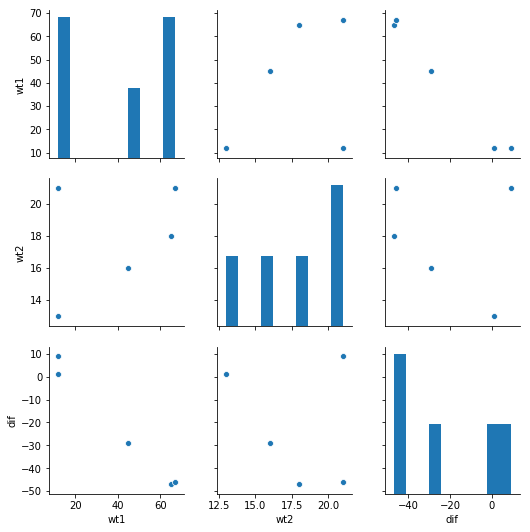

In [49]:
sns.pairplot(df)

<h3> Chi Square Test <h3>
    It is used to test the two categorical features from a single population. It is used to find the association between the values.

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [56]:
df=sns.load_dataset('tips')

In [57]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [58]:
dtab=pd.crosstab(df['sex'],df['smoker'])

In [59]:
dtab

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [63]:
observed=dtab.values

In [64]:
observed

array([[60, 97],
       [33, 54]], dtype=int64)

In [65]:
val=stats.chi2_contingency(dtab)

In [66]:
val

(0.008763290531773594, 0.925417020494423, 1, array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [67]:
expected=val[3]

In [68]:
expected

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [83]:
rows=len(dtab.iloc[0:2,0])
cols=len(dtab.iloc[0,0:2])
dof=(rows-1)*(cols-1)              #Degreee of freeddom
print('Degree of freedom {}'.format(dof))
alpha=0.05

Degree of freedom 1


In [84]:
from scipy.stats import chi2

In [85]:
chi=sum([(o-e)**2/e for o,e in zip(observed,expected)])

In [86]:
chi

array([0.00119737, 0.00073745])

In [87]:
chi=chi[0]+chi[1]

In [89]:
print('Chi square statistics is ',chi)

Chi square statistics is  0.001934818536627623


In [90]:
critic=chi2.ppf(q=1-alpha,df=dof)

In [91]:
print('Critical value is ',critic)

Critical value is  3.841458820694124


In [94]:
pvalue=1-chi2.cdf(x=chi,df=dof)

In [96]:
print('p-value:',pvalue)
print('Significance level: ',alpha)
print('Degree of Freedom: ',dof)
print('p-value:',pvalue)

p-value: 0.964915107315732
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.964915107315732


In [97]:
if chi>=critic:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if pvalue<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


Chi square value should be greater than the critical value